## 라이브러리 import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [6]:
for i in range (100):
    temp_data = pd.read_csv('./test1_result/dp%d-blow-xy.csv'%(i+1),skiprows = 4, sep=',')
    s = "xy_dp%d = temp_data"%(i+1)
    exec(s)

In [114]:
xy_dp1

,Z [ m ],Y [ m ]
0,0.000000,-2.231890e-01
1,0.003011,-2.231076e-01
2,0.006097,-2.232591e-01
3,0.007712,-2.233659e-01
4,0.009455,-2.235481e-01
...,...,...
56,0.062608,-1.341187e-02
57,0.061721,-1.003283e-02
58,0.059674,-7.137941e-03
59,0.058237,-3.880623e-03


In [117]:
a = xy_dp1.iloc[:,0]
b = xy_dp1.iloc[:,1]
plt.title("dp1",fontsize = 16)
plt.xlim(0,0.15)
plt.xlabel("Y (m)")
plt.ylabel("Z (m)")
plt.plot(a,b)

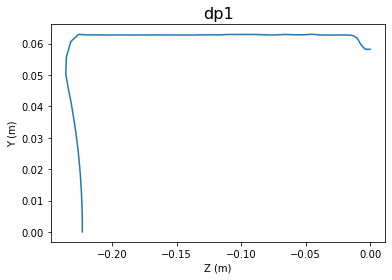

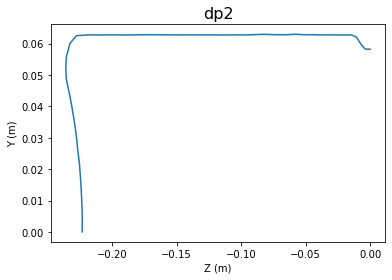

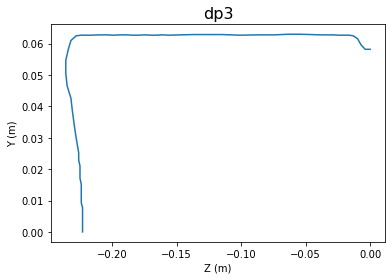

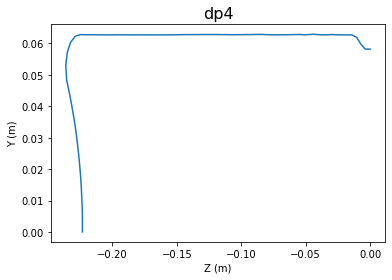

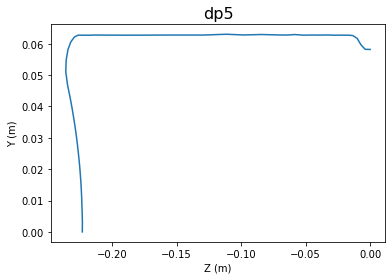

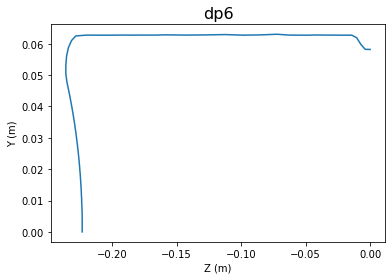

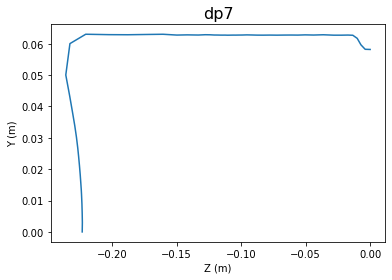

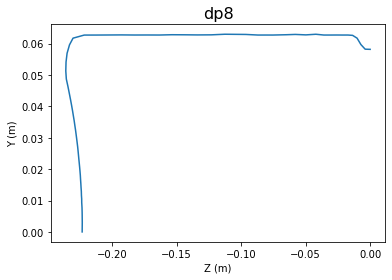

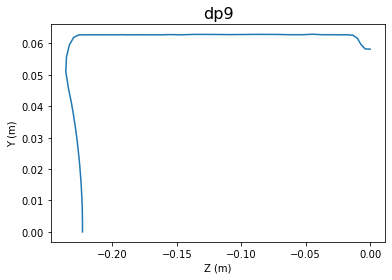

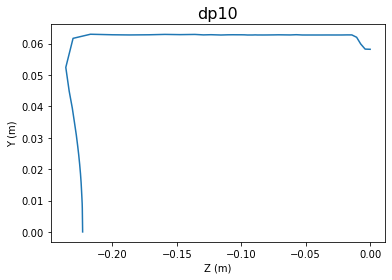

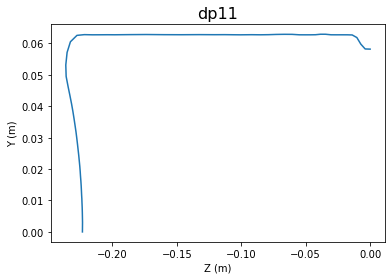

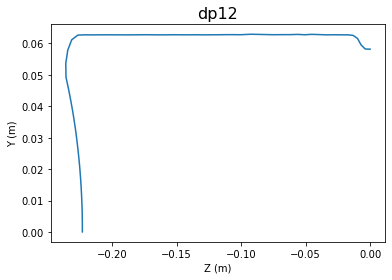

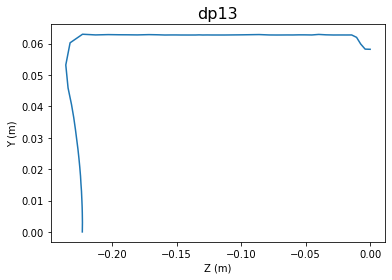

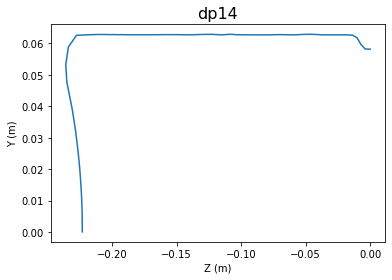

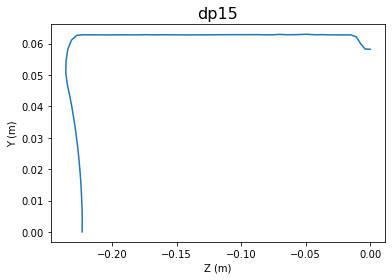

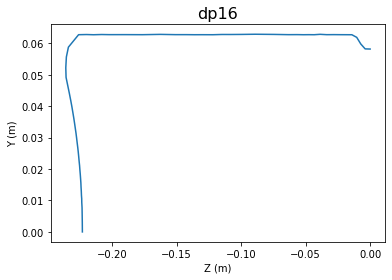

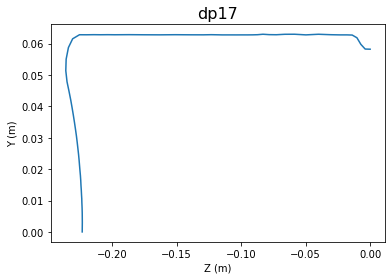

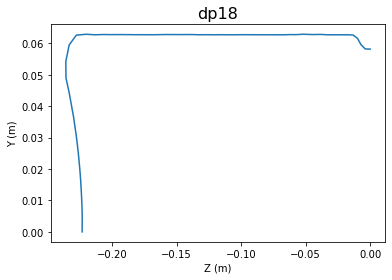

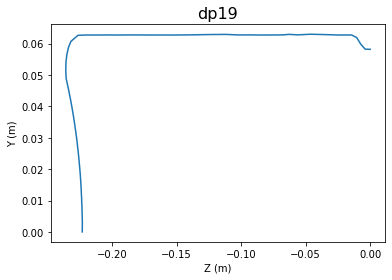

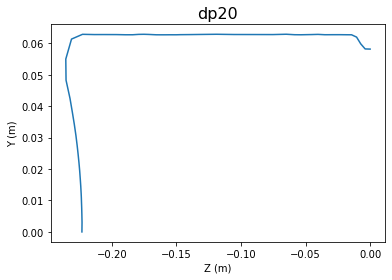

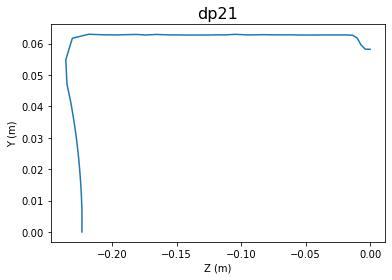

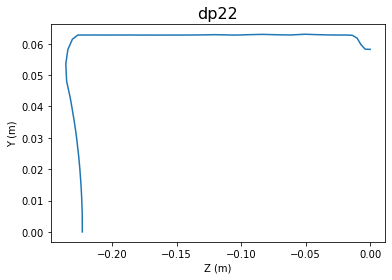

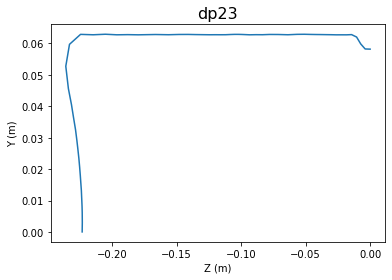

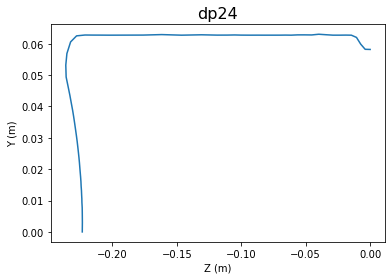

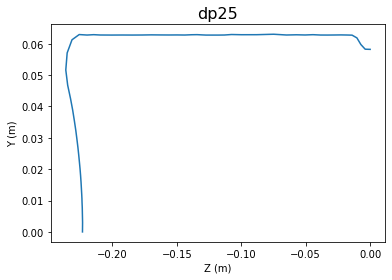

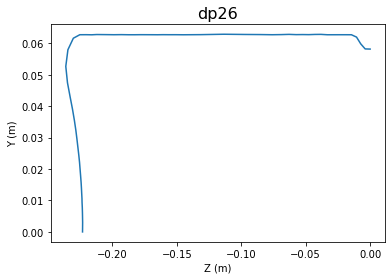

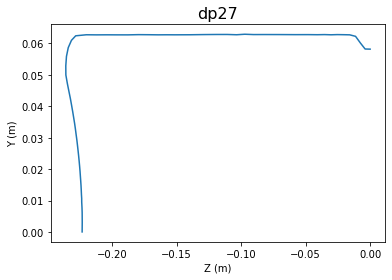

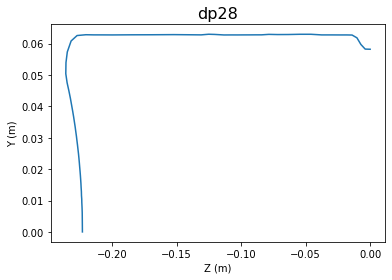

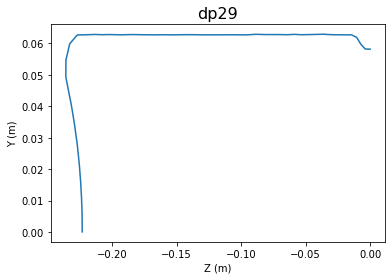

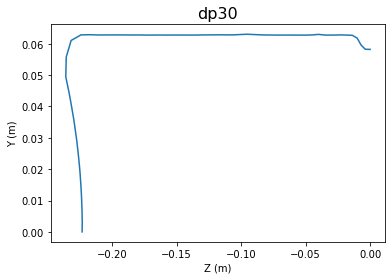

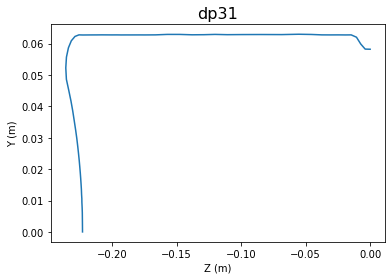

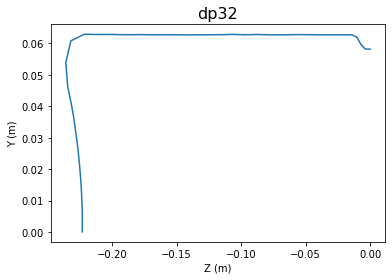

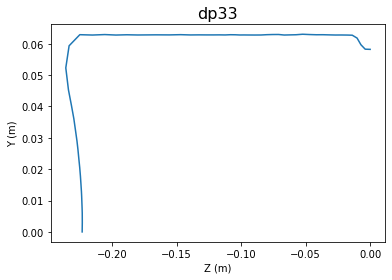

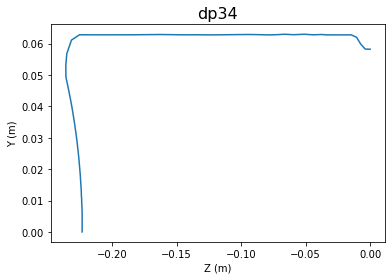

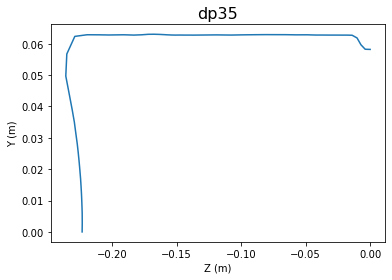

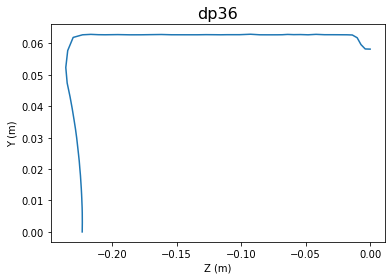

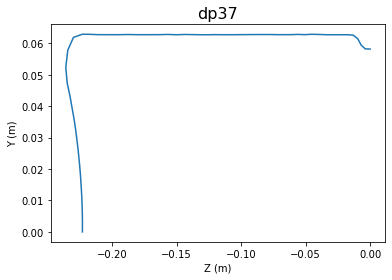

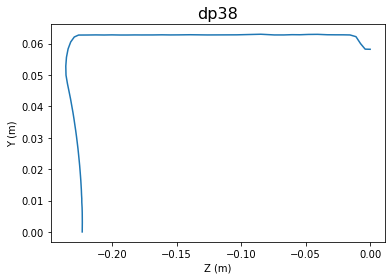

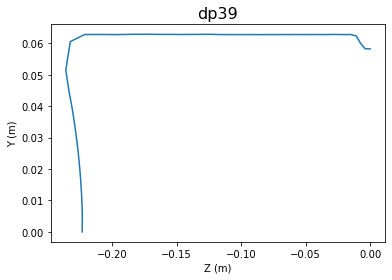

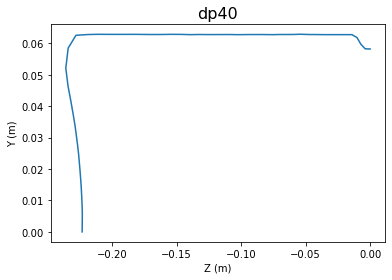

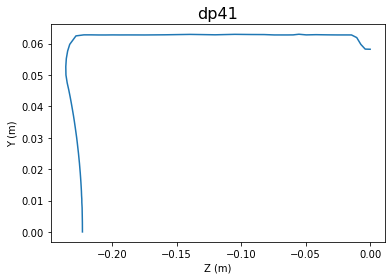

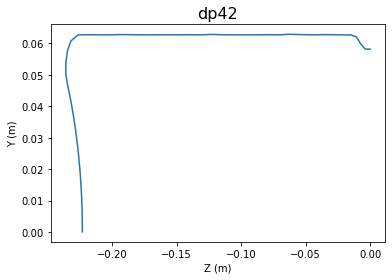

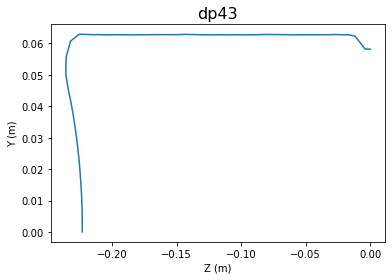

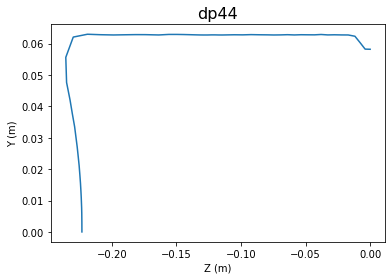

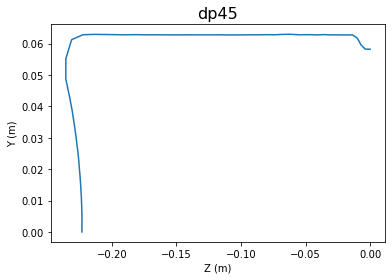

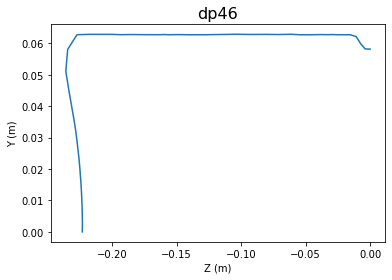

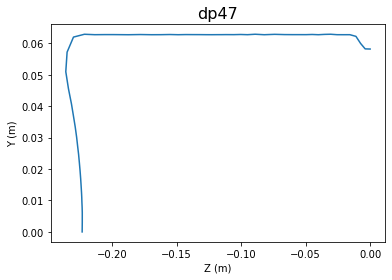

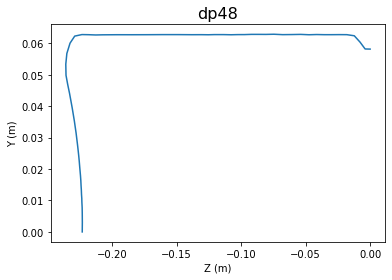

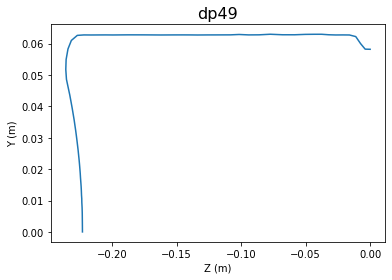

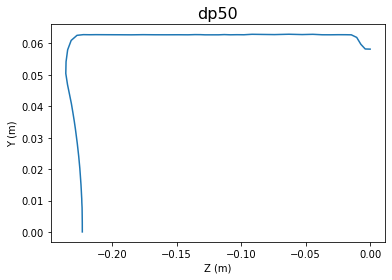

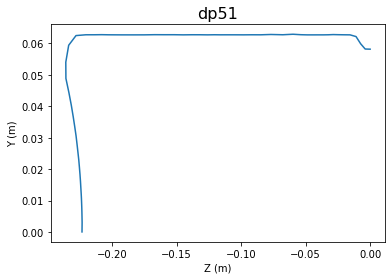

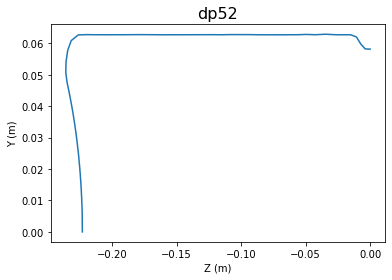

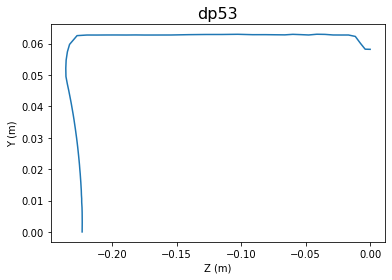

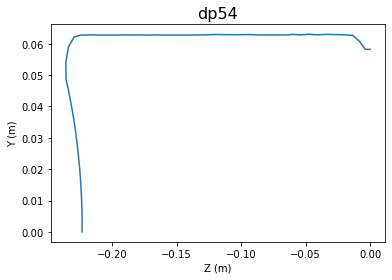

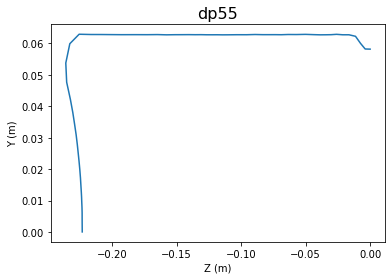

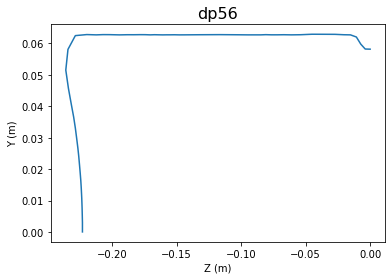

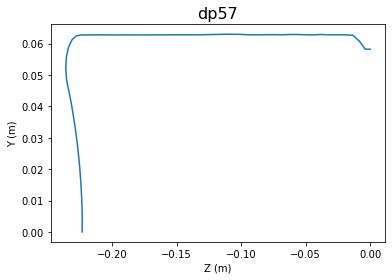

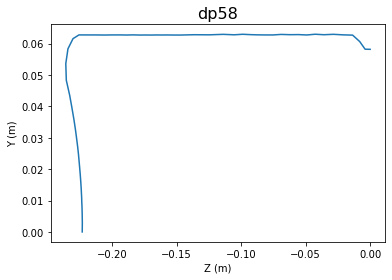

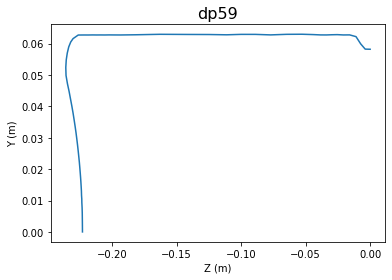

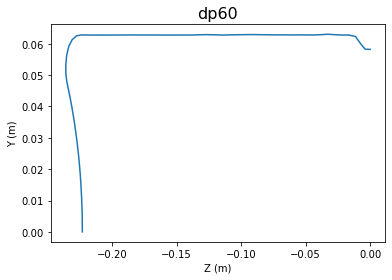

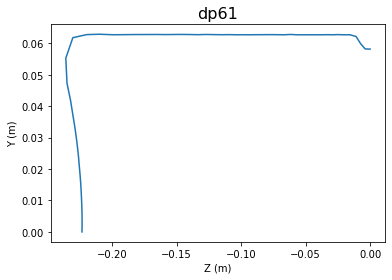

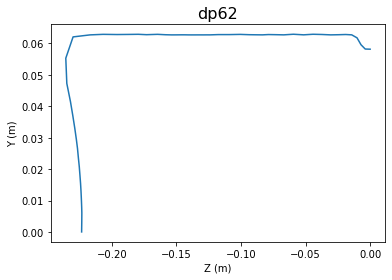

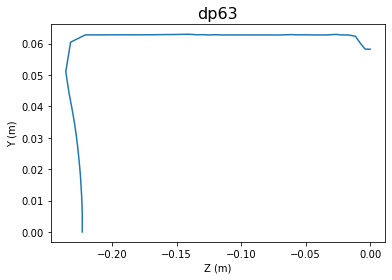

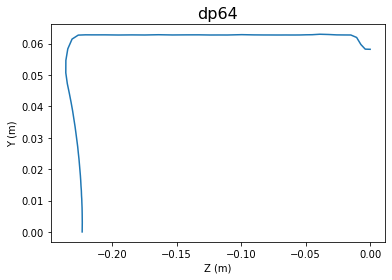

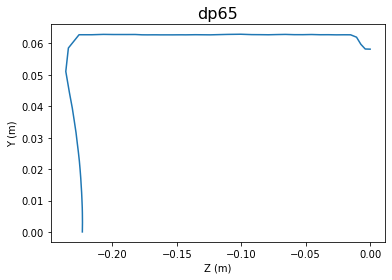

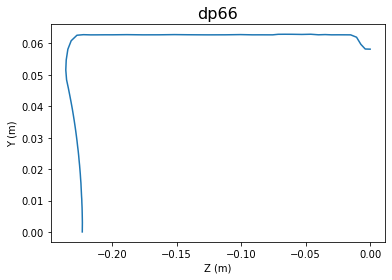

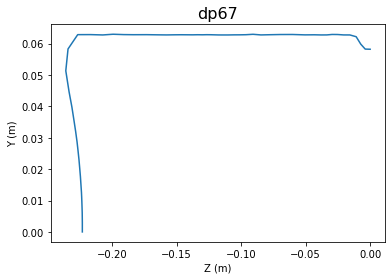

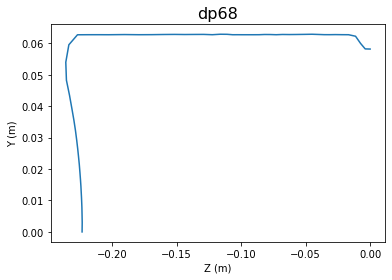

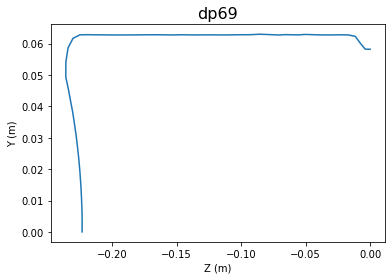

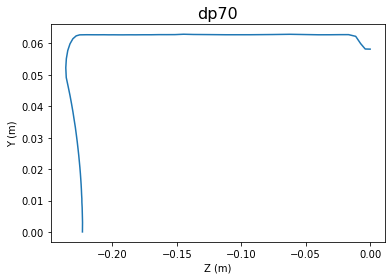

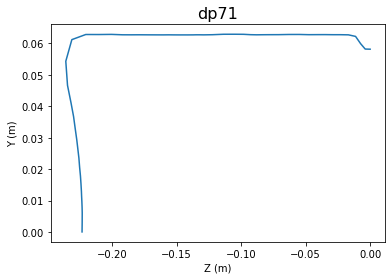

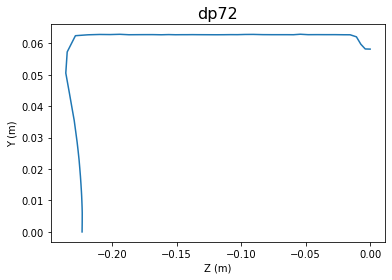

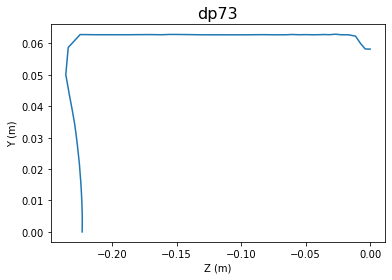

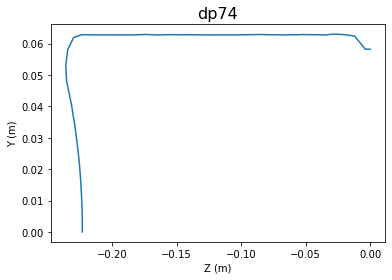

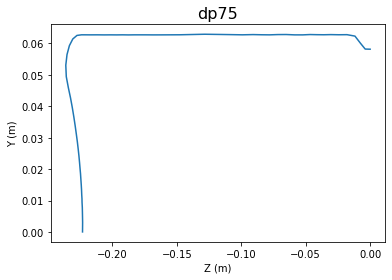

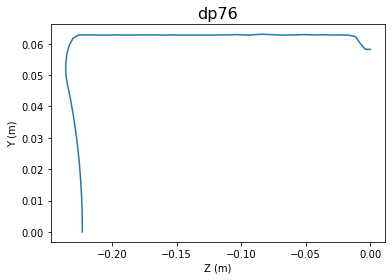

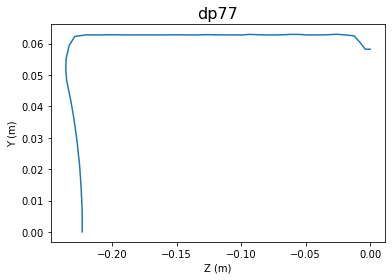

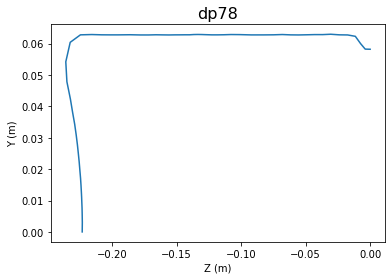

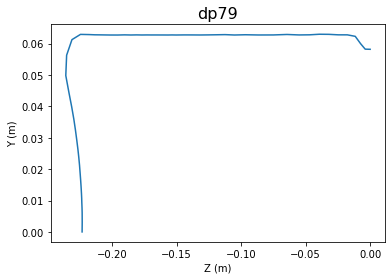

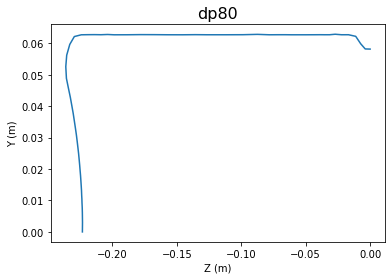

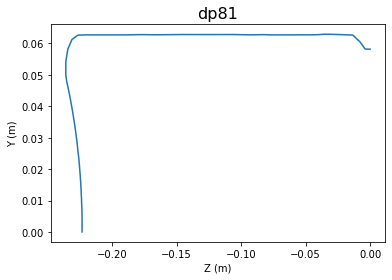

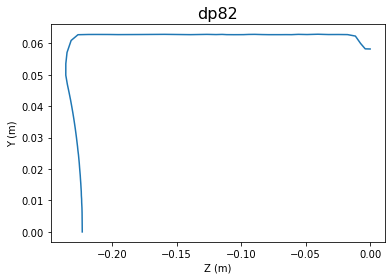

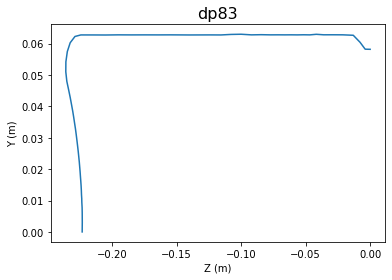

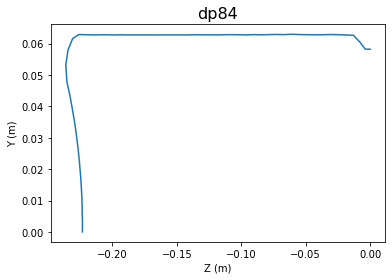

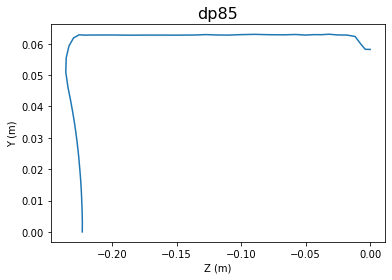

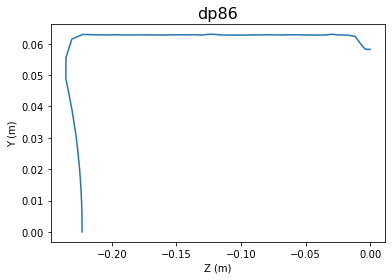

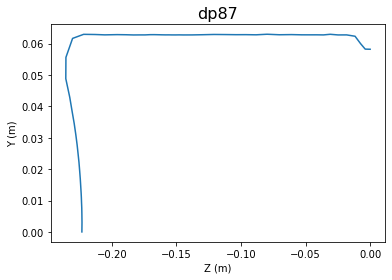

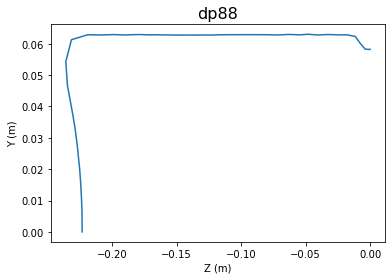

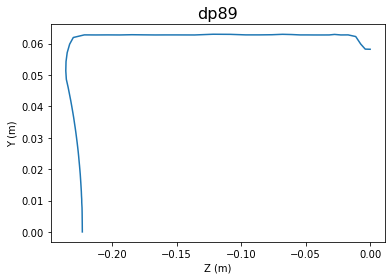

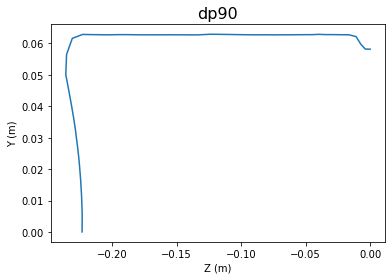

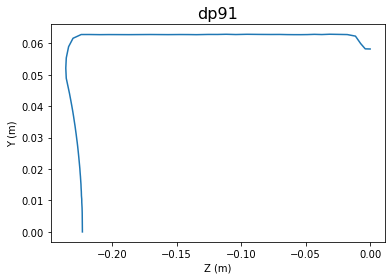

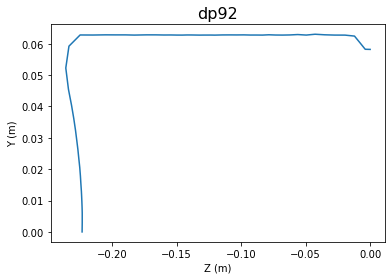

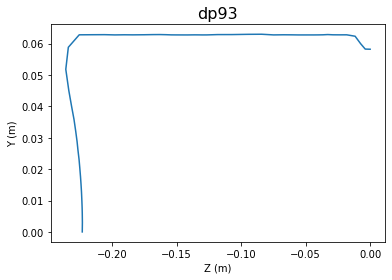

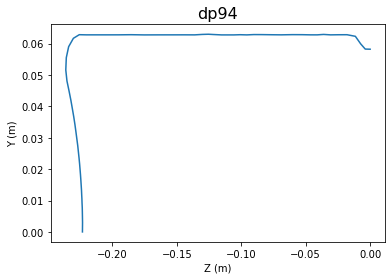

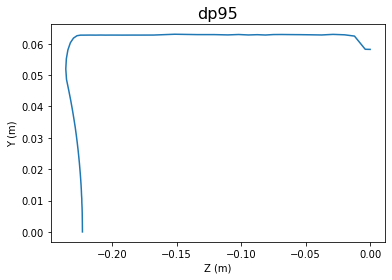

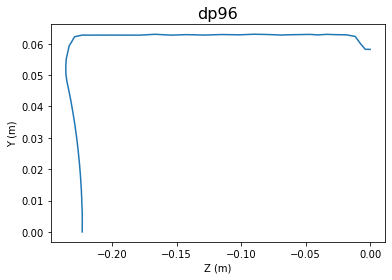

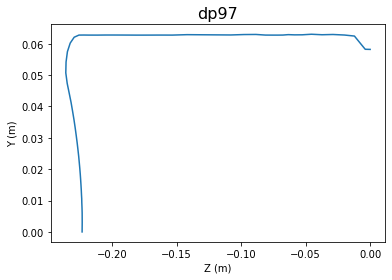

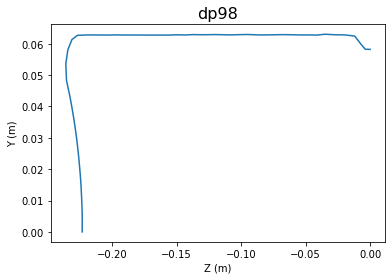

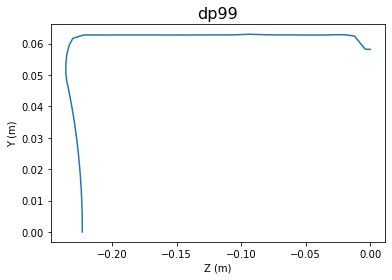

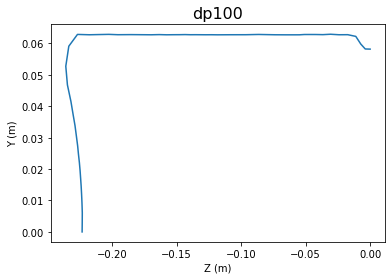

<Figure size 432x288 with 0 Axes>

In [11]:
for i in range (100):
    s = "plt.plot(xy_dp%d.iloc[:,1],xy_dp%d.iloc[:,0])"%(i+1,i+1)
    exec(s)
    plt.xlabel("Z (m)")
    plt.ylabel("Y (m)")
#     plt.xlim(0,0.3)
    # plt.ylim(0,0.003)
    plt.title("dp%d"%(i+1),fontsize = 16)
#     plt.savefig("C:/Users/SDML/Desktop/blow thickness plot/dp%d_thickness plot.jpg"%(i+1))
    plt.show()
    plt.clf()

## xy_dp 에서 자를 앞뒤 인덱스 리스트

In [41]:
# 앞뒤 자르기 
front_cut_list = []
back_cut_list  = []
for k in range (100):
    s = "temp_xy_data = xy_dp%d"%(k+1);exec(s)

    for i in range (temp_xy_data.shape[0]):
        if -0.01<(temp_xy_data.iloc[i,0]- temp_xy_data.iloc[i+1,0])/(temp_xy_data.iloc[i,1]- temp_xy_data.iloc[i+1,1])<0.01:
            front_cut_index = i
            front_cut_list = np.append(front_cut_list ,front_cut_index+1)
            print(s)
            print("front cut index : ",front_cut_index)
            break

    temp_xy_data_reverse = temp_xy_data[::-1]

    for j in range (1,temp_xy_data_reverse.shape[0]):
        if -0.01<(temp_xy_data_reverse.iloc[j,0]- temp_xy_data_reverse.iloc[j+1,0])/(temp_xy_data_reverse.iloc[j,1]- temp_xy_data_reverse.iloc[j+1,1])<0.01:
            back_cut_index = j
            back_cut_list = np.append(back_cut_list,back_cut_index+1)
            print("back cut index : ",back_cut_index)
            break




temp_xy_data = xy_dp1
front cut index :  23
back cut index :  5
temp_xy_data = xy_dp2
front cut index :  37
back cut index :  4
temp_xy_data = xy_dp3
front cut index :  26
back cut index :  5
temp_xy_data = xy_dp4
front cut index :  25
back cut index :  4
temp_xy_data = xy_dp5
front cut index :  27
back cut index :  5
temp_xy_data = xy_dp6
front cut index :  37
back cut index :  4
temp_xy_data = xy_dp7
front cut index :  19
back cut index :  5
temp_xy_data = xy_dp8
front cut index :  37
back cut index :  5
temp_xy_data = xy_dp9
front cut index :  24
back cut index :  5
temp_xy_data = xy_dp10
front cut index :  18
back cut index :  4
temp_xy_data = xy_dp11
front cut index :  30
back cut index :  5
temp_xy_data = xy_dp12
front cut index :  26
back cut index :  5
temp_xy_data = xy_dp13
front cut index :  20
back cut index :  4
temp_xy_data = xy_dp14
front cut index :  23
back cut index :  5
temp_xy_data = xy_dp15
front cut index :  27
back cut index :  4
temp_xy_data = xy_dp16
front cut i

<ipython-input-41-b0031a5b0b3f>:8: RuntimeWarning: divide by zero encountered in double_scalars
  if -0.01<(temp_xy_data.iloc[i,0]- temp_xy_data.iloc[i+1,0])/(temp_xy_data.iloc[i,1]- temp_xy_data.iloc[i+1,1])<0.01:


temp_xy_data = xy_dp66
front cut index :  35
back cut index :  4
temp_xy_data = xy_dp67
front cut index :  19
back cut index :  4
temp_xy_data = xy_dp68
front cut index :  21
back cut index :  4
temp_xy_data = xy_dp69
front cut index :  25
back cut index :  4
temp_xy_data = xy_dp70
front cut index :  30
back cut index :  4
temp_xy_data = xy_dp71
front cut index :  19
back cut index :  4
temp_xy_data = xy_dp72
front cut index :  21
back cut index :  4
temp_xy_data = xy_dp73
front cut index :  19
back cut index :  4
temp_xy_data = xy_dp74
front cut index :  24
back cut index :  5
temp_xy_data = xy_dp75
front cut index :  28
back cut index :  4
temp_xy_data = xy_dp76
front cut index :  32
back cut index :  4
temp_xy_data = xy_dp77
front cut index :  37
back cut index :  7
temp_xy_data = xy_dp78
front cut index :  22
back cut index :  4
temp_xy_data = xy_dp79
front cut index :  21
back cut index :  4
temp_xy_data = xy_dp80
front cut index :  29
back cut index :  4
temp_xy_data = xy_dp81
fr

## thick_dp 에서 자를 앞뒤 길이 리스트

In [71]:
bottom_length_list = []
top_length_list    = []
for k in range (100):
    exec("temp_bottom_data = xy_dp%d.iloc[:int(front_cut_list[k]),:]"%(k+1))
    
    temp_bottom_length = 0
    for i in range(temp_bottom_data.shape[0]-1):
        a = np.square(temp_bottom_data.iloc[i,0]-temp_bottom_data.iloc[i+1,0])
        b = np.square(temp_bottom_data.iloc[i,1]-temp_bottom_data.iloc[i+1,1])
        temp_bottom_length = temp_bottom_length + np.sqrt(a+b)
    bottom_length_list = np.append(bottom_length_list, temp_bottom_length)

    exec("xy_dp%d_reverse = xy_dp%d[::-1]"%(k+1,k+1))
    exec("temp_top_data = xy_dp%d_reverse.iloc[:int(back_cut_list[k]),:]"%(k+1))
    temp_top_length = 0
    for j in range(temp_top_data.shape[0]-1):
        a = np.square(temp_top_data.iloc[j,0]-temp_top_data.iloc[j+1,0])
        b = np.square(temp_top_data.iloc[j,1]-temp_top_data.iloc[j+1,1])
        temp_top_length = temp_top_length + np.sqrt(a+b)
    top_length_list = np.append(top_length_list, temp_top_length)
    
    


In [107]:
bottom_length_list

array([0.07673629, 0.07789498, 0.07337613, 0.07179063, 0.07009743,
       0.07692509, 0.075276  , 0.07464799, 0.07051057, 0.07884433,
       0.07482573, 0.0747541 , 0.08316547, 0.08548873, 0.07358303,
       0.0701773 , 0.07096487, 0.08893309, 0.07620779, 0.07353574,
       0.08810153, 0.06977791, 0.09955061, 0.07537838, 0.08681892,
       0.07101758, 0.07641101, 0.07599747, 0.08865699, 0.07225142,
       0.07372868, 0.07449798, 0.09880219, 0.07114533, 0.07682012,
       0.08558093, 0.07303421, 0.07031886, 0.07451584, 0.07716407,
       0.0743499 , 0.07587848, 0.0793552 , 0.0871905 , 0.08270228,
       0.07858544, 0.0828582 , 0.07301867, 0.07448294, 0.07403134,
       0.07607158, 0.07593488, 0.07678461, 0.07714162, 0.07057257,
       0.08912747, 0.07211088, 0.07063088, 0.0699943 , 0.07284802,
       0.09716013, 0.08937744, 0.07482359, 0.07582016, 0.07021838,
       0.07958151, 0.06931112, 0.06949944, 0.07151798, 0.07113821,
       0.07561602, 0.08649812, 0.07116654, 0.07243582, 0.07252

## 모든 data slicing

In [74]:
for i in range (100):
    temp_data = pd.read_csv('./test1_result/dp%d-blow-thick.csv'%(i+1),skiprows = 4, sep=',')
    s = "thick_dp%d = temp_data"%(i+1)
    exec(s)

In [118]:
thick_dp1

,Curve Length on Polyline 1 [ m ],THICKNESS [ m ]
0,0.000000,0.002760
1,0.003012,0.002548
2,0.006101,0.002492
3,0.007720,0.002040
4,0.009473,0.001648
...,...,...
56,0.283006,0.001917
57,0.286500,0.001991
58,0.290046,0.002033
59,0.293606,0.002398


In [86]:
for k in range(100):
    exec("temp_thick_data = thick_dp%d"%(k+1))
    for m in range(temp_thick_data.shape[0]):
        if temp_thick_data.iloc[m,0] > top_length_list[k]:
            front_cut_index = m
            break
    
    temp_thick_data_reverse = temp_thick_data[::-1]
    
    for n in range(temp_thick_data_reverse.shape[0]):
        if temp_thick_data_reverse.iloc[n,0] < temp_thick_data_reverse.iloc[0,0]-bottom_length_list[k]:
            back_cut_index = n
            break
            
    cut_temp_thick_data = temp_thick_data.iloc[front_cut_index:-back_cut_index,:]
    s2 = "cut_thickness_dp%d = cut_temp_thick_data"%(k+1);exec(s2)

In [96]:
cut_thickness_dp1

,Curve Length on Polyline 1 [ m ],THICKNESS [ m ]
9,0.018458,0.000639
10,0.020766,0.000563
11,0.023228,0.000525
12,0.025537,0.000469
13,0.028286,0.000401
14,0.031332,0.000353
15,0.034518,0.000308
16,0.038071,0.000259
17,0.042211,0.000210
18,0.046897,0.000173


In [105]:
for i in range(100):
    exec("pd.DataFrame(cut_thickness_dp%d).to_csv('D:/testoneblow/sidewall thickness data/dp%d-blow-thick-sidewallcut.csv')"%(i+1,i+1))

In [102]:
for i in range (100):
    s = "plt.plot(cut_thickness_dp%d.iloc[:,0],cut_thickness_dp%d.iloc[:,1])"%(i+1,i+1)
    exec(s)
    plt.xlabel("Curve Length on Polyline")
    plt.ylabel("thickness")
    plt.xlim(0,0.3)
    plt.ylim(0,0.003)
    plt.title("dp%d"%(i+1),fontsize = 16)
#     plt.savefig("C:/Users/SDML/Desktop/blow thickness plot/dp%d_thickness plot.jpg"%(i+1))
    plt.show()
#     plt.close()
    plt.clf()
